# Cálculo numérico en Python

Para trabajar con cálculo numérico en Python (incluyendo complejos, matrices, etc.) usaremos siempre el módulo 
"numpy"

## Matrices (arrays)

Los "arrays" no son matrices en sentido estricto sino vectores de cualquier dimensión. Si multiplicamos 2 arrays de dimensión 2, no hace el producto matricial sino que multiplica los arrays elemento a elemento. Hay que usar las funciones específicas para el producto matricial o definir el objeto como clase "matrix" (que es un tipo especial de "array" que tiene implementados los métodos de las matrices matemáticas)

In [1]:
import numpy as np

Empezamos por convertir una lista en un array de numpy

In [ ]:
list1=[0.5, 0.7, 0.9]

In [ ]:
list2=[2, 2.1, 2.2]

In [ ]:
array1 = np.array(list1)
array1

In [ ]:
array2=np.array(list2)

In [ ]:
array3 = np.array([0.5, 0, -0.777])
array3

In [ ]:
array1.shape

In [ ]:
np.shape(array1)

Y crear un array de arrays, es decir, de 2 dimensiones

In [ ]:
array1_2=np.array([array1,array2])

In [ ]:
#type(array1_2)
array1_2.shape
#np.shape(array1_2)

In [ ]:
print(array1_2)

In [ ]:
array1_2

In [ ]:
array1_3 = np.array([array1,array3])
array1_3

Si ahora queremos añadirle otro "array", no se utiliza la función "append" de las listas, para pegarle otro array se utiliza "concatenate"

In [ ]:
array2_3 = np.concatenate((array1,array2))
array2_3

Y si queremos añadirla en un array de 2 dimensiones hay que decirle en qué eje se lo queremos añadir

In [ ]:
print(array1_2.shape)
print(array1_3.shape)
array1_2_3 = np.concatenate((array1_2, array1_3), axis=0)
array1_2_3

In [ ]:
array1_2_3 = np.concatenate((array1_2, array1_3), axis=1)
array1_2_3

Para generar una secuencia regular con numpy existe la función "linspace" (o "logspace" si lo queremos en escala logarítmica, pero se indican los exponentes para el comienzo y el final de la secuencia).
Se indica el primer valor de la secuencia, el último, y el número total de puntos de la secuencia.
En este caso $\bf{SÍ}$ se incluye el valor final.

In [ ]:
N=101 
#Notar que N suele ser el número de puntos que queremos +1 porque incluye el primero y el último
t=np.linspace(0,10,N)
print(t)

In [ ]:
type(t)
#print(t)

In [ ]:
tlog = np.logspace(0,2,11) #desde 10^0 hasta 10^2, ambos inclusive
print(tlog)

# Integral numerica

Vamos a comenzar a hacer cálculo numérico. Empezaremos con la integral del $sin(x)$ entre $0$  y $\pi$

In [ ]:
N = 10000 #Nº de puntos para hacer la integral

In [ ]:
x = np.linspace(0, np.pi , N)
print(x[-1], np.pi)

In [ ]:
y = np.sin(x)
print(y[-1])

Haremos la integral numérica con el método del trapecio: $$\sum_{i=1}^{N}\frac{f(x_{i-1})+f(x_{i})}{2}\cdot \Delta x$$

In [ ]:
f = y
f.shape

In [ ]:
integr= 0.0
for i in range(1,N):
    integr = integr + ((f[i-1]+f[i])/2)*(x[i]-x[i-1])
    
print(integr)

In [ ]:
2-integr

Y finalmente usando la propia función de Python para calcular integrales numéricas por el método del "Trapecio"

In [ ]:
integr=np.trapz(y,x)
print(integr)


# Cálculo del radio del planeta

Como conocemos el valor de la gravedad "g" vamos a calcular el radio del planeta, $R_{P}$ usando la definición del campo gravitatorio para un cuerpo de radio R, conocida su densidad. Su módulo se puede escribir como:
$$g(R_P)=G\frac{M}{R_P^2}=\frac{G}{R_P^2} {\int_{0}^{R_P}{\rho(r) 4\pi r^2} dr}$$


Como nos dicen que su densidad varía linealmente desde el hierro fundido en el núcleo ($\rho_{0}=11 g/cm^3$) hasta los silicatos ($\rho_{1}=2.7 g/cm^3$) en la corteza, la escribiremos como:
$$\rho(r) = (\rho_{1} - \rho_{0}) \frac{r}{R_{P}}+\rho_{0}$$

Comenzamos por calcular el valor de la masa del planeta de radio R para, después, calcular el valor de su gravedad

In [43]:
R = 6370000  #ponemos un valor como el de la Tierra para ver qué saldría
G = 6.674e-11
rho0 = 11000
rho1 = 2700


In [44]:
r = np.linspace(0,R,1001)
r

array([      0.,    6370.,   12740., ..., 6357260., 6363630., 6370000.])

In [45]:
rho = r*(rho1-rho0)/R + rho0
rho

array([11000. , 10991.7, 10983.4, ...,  2716.6,  2708.3,  2700. ])

In [46]:
f=4*np.pi*r*r*rho

In [47]:
M = np.trapz(f,r)
M

5.169877067397985e+24

In [48]:
g = G*M/(R*R)
g

8.503301027878953

Como no sabemos qué radio tiene el planeta tendremos que ir variando el radio para luego comparar el valor de la gravedad con el valor dado

In [49]:
R_i = 6370000  #valor arbitrario para el radio del planeta
N = 1001 # Número de puntos para calcular la integral
rho0 = 11000
rho1 = 2700
r = np.linspace(0,R_i,N)
rho = rho0 + r*(rho1 - rho0)/R_i
f = 4*np.pi*r*r*rho
M = np.trapz(f,r)
g = G*M/(R_i*R_i)
g

8.503301027878953

Como ya tenemos el bloque de programa para calcular la gravedad para un radio dado $R_i$, lo vamos a meter en una función

In [50]:
def gravedad(R_i,N):
    r = np.linspace(0,R_i,N)
    rho = rho0 + r*(rho1 - rho0)/R_i
    f = 4*np.pi*r*r*rho
    M = np.trapz(f,r)
    g = G*M/(R_i*R_i)
    return g


In [52]:
gravedad(6370000,1000)

8.503301025292918

 ### Cálculo de los valores de la gravedad en función del radio del planeta

In [53]:
g_real = 5.6

R0 = 1000000 #comenzamos con un valor de 1.000km
R1 = 10000000
N_R = 21  # Número de radios de planeta para los que vamos a calcular la gravedad
N_r = 10000 #número de puntos del linspace para calcular la masa del planeta

G = 6.674e-11
rho0 = 11000
rho1 = 2700

R_vect = np.linspace(R0,R1,N_R)
print((R_vect))

[ 1000000.  1450000.  1900000.  2350000.  2800000.  3250000.  3700000.
  4150000.  4600000.  5050000.  5500000.  5950000.  6400000.  6850000.
  7300000.  7750000.  8200000.  8650000.  9100000.  9550000. 10000000.]


Y ahora vamos a hacerlo para todo el conjunto de valores de Radios de Planetas:

In [33]:
R0 = 1000000 #comenzamos con un valor de 1.000km
R1 = 10000000 #radio final
N_R = 21  # Número de radios de planeta para los que vamos a calcular la gravedad
N_r = 1000
R_vect = np.linspace(R0,R1,N_R)
g_i=np.empty(len(R_vect))

i=0
for R_i in R_vect:
    g_i[i] = gravedad(R_i,N_r)
    print(R_i, g_i[i])
    i += 1


1000000.0 1.3348981201401755
1450000.0 1.9356022742032546
1900000.0 2.5363064282663337
2350000.0 3.137010582329413
2800000.0 3.7377147363924923
3250000.0 4.338418890455571
3700000.0 4.9391230445186505
4150000.0 5.53982719858173
4600000.0 6.140531352644809
5050000.0 6.741235506707888
5500000.0 7.341939660770966
5950000.0 7.942643814834045
6400000.0 8.543347968897123
6850000.0 9.144052122960204
7300000.0 9.744756277023285
7750000.0 10.345460431086362
8200000.0 10.946164585149443
8650000.0 11.54686873921252
9100000.0 12.1475728932756
9550000.0 12.748277047338677
10000000.0 13.348981201401758


Y ahora lo podemos representar en una gráfica

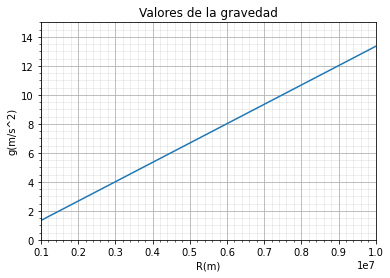

In [60]:
from matplotlib import pylab as plt

plt.plot(R_vect,g_i)
plt.xlabel('R(m)')
plt.ylabel('g(m/s^2)')
plt.grid(True)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.axis([0.1e7, 1e7, 0., 15])
plt.title('Valores de la gravedad')
#plt.savefig('valores_gravedad.jpg')
plt.show()


# Bucle    $\bf{While}$  

Ya hemos visto el bucle $\bf{for}$ y ahora vamos a ver el otro bucle que se utiliza mucho: $\bf{while}$

En este caso el bloque de programa se va a repetir MIENTRAS se cumpla la condición.
Recordar que después de la condición hay que poner el signo $\bf{:}$, y el conjunto de instrucciones se tienen que estar $\bf{tabulado}$ para que Python sepa cuáles son las que tiene que ejecutar

### Cálculo del radio por aproximaciones sucesivas

Para aproximarnos al valor real lo vamos a hacer por sucesivas aproximaciones. En lugar de ir tomando incrementos constantes para los valores del radio del planeta, comenzamos por un valor inicial del Radio y vamos a ir haciendo aproximaciones al radio: Si nos quedamos cortos lo hacemos más grande, y  si nos pasamos hacemos el radio más pequeño, y hacemos la variación  más pequeña.

$$\rm{Si} \hspace{5mm} g < g_{real} \hspace{5mm} R=r+\Delta R$$
$$\rm{Si} \hspace{5mm} g > g_{real} \hspace{5mm} R=r-\Delta R$$  
$$\rm{Si} \hspace{5mm} g > g_{real} \hspace{5mm} \Delta R  =   \Delta R /2$$


In [57]:
g_real = 5.6
error_g = 0.05

Vamos a calcular la integral numérica del campo gravitatoria para el planeta de los pájaros enfadados

In [59]:
g_real = 5.6
error_g = 0.05
error=1
R_i=1000000
Delta_R = 500000  #comenzamos con un "paso" de 500 km
N_r = 1000 #número de valores de radios para hacer la integral

while abs(error)>error_g:
    g = gravedad (R_i,N_r)
    error = g - g_real
    print('R_i=',R_i, '; g=',g, '; error:',error)
    if error > 0:
        R_i = R_i - Delta_R
        Delta_R = Delta_R/2
    else:
        R_i = R_i + Delta_R
    print('Delta_R:', Delta_R, '; nuevo radio:',R_i)
print('valor de g=',g, ' para R_i=',R_i)

R_i= 1000000 ; g= 1.3348981201401755 ; error: -4.265101879859824
Delta_R: 500000 ; nuevo radio: 1500000
R_i= 1500000 ; g= 2.0023471802102635 ; error: -3.597652819789736
Delta_R: 500000 ; nuevo radio: 2000000
R_i= 2000000 ; g= 2.669796240280351 ; error: -2.9302037597196486
Delta_R: 500000 ; nuevo radio: 2500000
R_i= 2500000 ; g= 3.3372453003504394 ; error: -2.26275469964956
Delta_R: 500000 ; nuevo radio: 3000000
R_i= 3000000 ; g= 4.004694360420527 ; error: -1.5953056395794727
Delta_R: 500000 ; nuevo radio: 3500000
R_i= 3500000 ; g= 4.672143420490616 ; error: -0.9278565795093838
Delta_R: 500000 ; nuevo radio: 4000000
R_i= 4000000 ; g= 5.339592480560702 ; error: -0.26040751943929763
Delta_R: 500000 ; nuevo radio: 4500000
R_i= 4500000 ; g= 6.00704154063079 ; error: 0.40704154063079034
Delta_R: 250000.0 ; nuevo radio: 4000000
R_i= 4000000 ; g= 5.339592480560702 ; error: -0.26040751943929763
Delta_R: 250000.0 ; nuevo radio: 4250000.0
R_i= 4250000.0 ; g= 5.6733170105957464 ; error: 0.07331701

 ### Problema

Vamos a calcular cuántos huevos, de masa 100g, habría que lanzarle al cerdo, de masa 50kg, para detenerlo, si se movía con una velocidad de 1 m/s, y los huevos los disparábamos a 10m/s

Primero  definimos los parámetros del problema:

In [2]:
mc = 50 # masa del cerdo
mh = 0.1  #masa de los huevos
vc0 = 1 #velocidad inicial del cerdo
vh = 10 #velocidad de los huevos

#vci: "velocidad del cerdo antes del choque"
#vcf: "velocidad del cerdo después del choque"
vci = vc0 #inicializamos la variable "velociad del cerdo antes del choque"
vcf = vc0 #inicializamos la variable "velociad del cerdo después del choque"

In [3]:
n=0
while vcf > 0: #ejecuta mientras que la velocidad final del cerso sea positiva (hacia la derecha)
    vcf = (mc*vci - mh*vh)/(mc+mh)  #ecuación del choque ineslástico
    vci = vcf  #después del choque, actualizamos la nueva velocidad "antes" del choque
    mc = mc+mh  #después de comerse el huevo aumenta su masa
    n = n+1  #lanzamos otro huevo
print(n)

51
